# Mall Customers Dataset

The Mall Customers Dataset contains information about 200 customers visiting a shopping mall. It is commonly used for customer segmentation and clustering tasks to understand spending habits and demographics.

**Columns**

- CustomerID – Unique ID for each customer

- Gender – Male or Female

- Age – Customer age in years

- Annual Income (k$) – Annual income in thousand dollars

- Spending Score (1-100) – Score based on spending behavior

**Key Points**

- No missing values

- Age range: 19–70 years

- Annual income: $15k–$137k

- Spending score: 1–100

- Gender distribution: roughly balanced

**Purpose**
Used for clustering and segmentation to identify distinct customer groups and target marketing strategies effectively.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load Dataset
DATA_PATH = "/kaggle/input/mall-customer-dataset/Mall_Customers.csv"
OUT_DIR = "/kaggle/working"
os.makedirs(OUT_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)
df.columns = [c.strip() for c in df.columns]

print("Data loaded:", df.shape)
print(df.head())

Data loaded: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40



Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Numeric description:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Gender counts:
 Gender
Female    112
Male       88
Name: count, dtype: int64


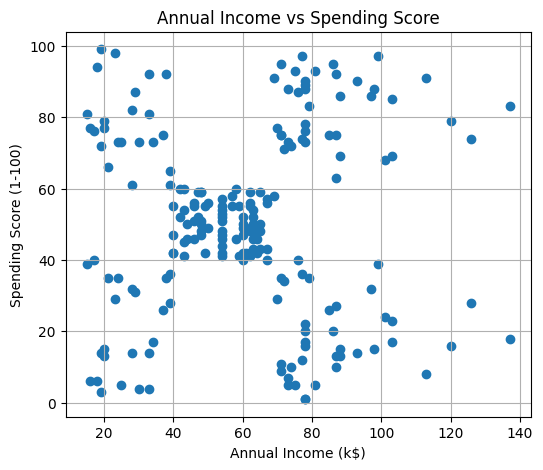

In [3]:
# Quick EDA
print("\nMissing values:\n", df.isnull().sum())
print("\nNumeric description:\n", df.describe())
print("\nGender counts:\n", df["Gender"].value_counts())

# Scatter plot Income vs Spending
plt.figure(figsize=(6,5))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.grid(True)
plt.savefig(os.path.join(OUT_DIR, "income_vs_spending.png"))
plt.show()


In [4]:
# Prepare Features 
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


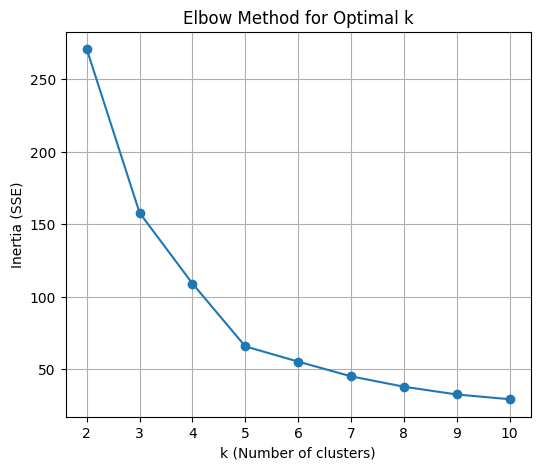

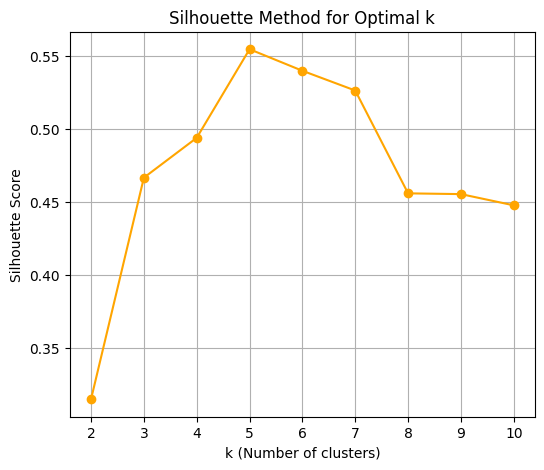

Best k based on silhouette: 5


In [5]:
# Find Best k (Elbow + Silhouette)

inertias, sil_scores = [], []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(6,5))
plt.plot(K, inertias, marker='o')
plt.xlabel("k (Number of clusters)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.xticks(K)
plt.grid(True)
plt.savefig(os.path.join(OUT_DIR, "elbow.png"))
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(6,5))
plt.plot(K, sil_scores, marker='o', color="orange")
plt.xlabel("k (Number of clusters)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.xticks(K)
plt.grid(True)
plt.savefig(os.path.join(OUT_DIR, "silhouette.png"))
plt.show()

# Decide best k
best_k = K[np.argmax(sil_scores)]
print("Best k based on silhouette:", best_k)


In [6]:
# KMeans Clustering
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)


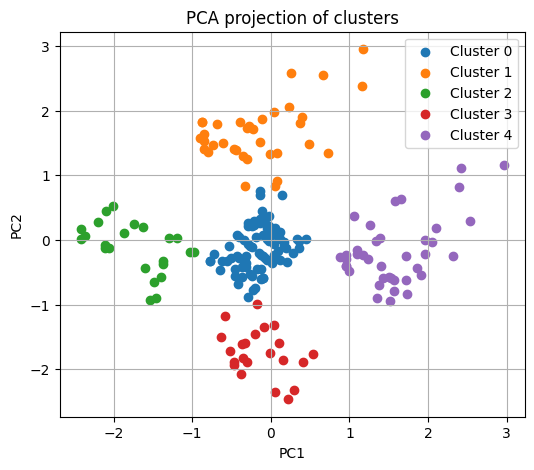

In [7]:
# PCA for Visualization
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for cl in sorted(df["Cluster"].unique()):
    mask = df["Cluster"] == cl
    plt.scatter(pc[mask,0], pc[mask,1], label=f"Cluster {cl}")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection of clusters")
plt.grid(True)
plt.savefig(os.path.join(OUT_DIR, "pca.png"))
plt.show()


In [8]:
# 7. Export Results
out_csv = os.path.join(OUT_DIR, "mall_customers_clustered.csv")
df.to_csv(out_csv, index=False)
print("\nClustered dataset saved to:", out_csv)
print("\nCluster counts:\n", df["Cluster"].value_counts())



Clustered dataset saved to: /kaggle/working/mall_customers_clustered.csv

Cluster counts:
 Cluster
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64


In [9]:
# Accuraccy Score for best k
sil = silhouette_score(X_scaled, df["Cluster"])
print("Silhouette Score:", sil)

Silhouette Score: 0.5546571631111091
